In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime as dt
import yfinance as yf 

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, Dropout, LSTM

In [2]:

print("starttt")
company = 'AAPL'
start = dt.datetime(2012,1,1)
end = dt.datetime(2022,1,1)


#data = web.DataReader(company, 'yahoo',start,end)
df= yf.download(company,start=start, end=end)
df.head()


starttt


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449692,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516596,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655558,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787852,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767569,394024400


        Open       High        Low      Close     Volume
0  14.621429  14.732143  14.607143  14.686786  302220800
1  14.642857  14.810000  14.617143  14.765714  260022000
2  14.819643  14.948214  14.738214  14.929643  271269600
3  14.991786  15.098214  14.972143  15.085714  318292800
4  15.196429  15.276786  15.048214  15.061786  394024400


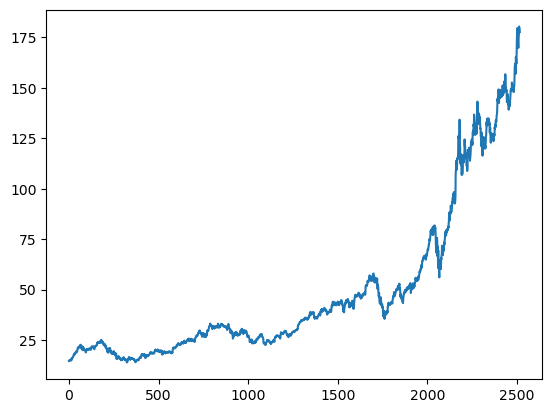

In [4]:

df= df.reset_index()
df= df.drop(['Date', 'Adj Close'], axis=1)
print(str(df.head()))

print(plt.plot(df.Close))

In [5]:
df

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400
...,...,...,...,...,...
2512,177.089996,180.419998,177.070007,180.330002,74919600
2513,180.160004,181.330002,178.529999,179.289993,79144300
2514,179.330002,180.630005,178.139999,179.380005,62348900
2515,179.470001,180.570007,178.089996,178.199997,59773000


In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2512    153.3444
2513    153.6667
2514    153.9991
2515    154.3202
2516    154.6399
Name: Close, Length: 2517, dtype: float64

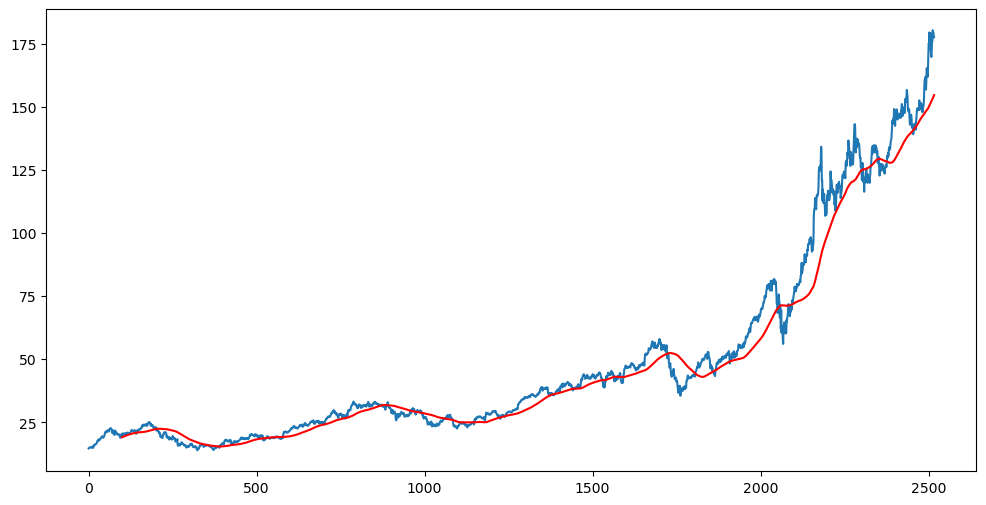

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    142.85570
2513    143.13220
2514    143.40125
2515    143.66845
2516    143.95365
Name: Close, Length: 2517, dtype: float64

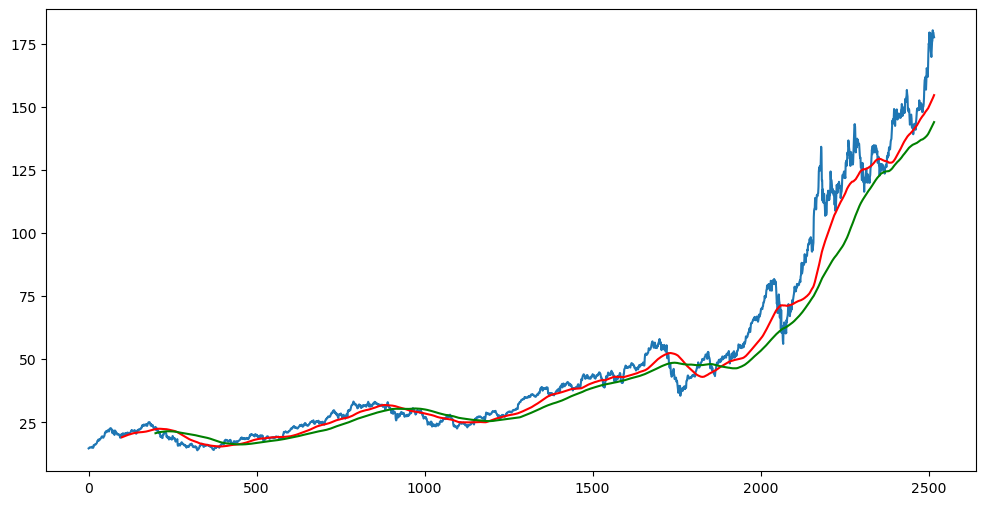

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [10]:
df.shape

(2517, 5)

In [14]:
#split into training and testing data
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])
print(data_training.shape)

(1761, 1)


In [12]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [15]:
data_testing.head()

,Close
1761,35.547501
1762,37.064999
1763,36.982498
1764,37.687500
1765,38.327499


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.56977531],
       [0.57834128],
       [0.57936234]])

In [22]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train=np.array(x_train),np.array(y_train)

In [28]:
#the machine learning model 
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 
model = Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_3 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_4 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [30]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50

52/52 [==============================] - 15s 166ms/step - loss: 0.0427
Epoch 2/50
52/52 [==============================] - 8s 163ms/step - loss: 0.0083
Epoch 3/50
52/52 [==============================] - 10s 185ms/step - loss: 0.0069
Epoch 4/50
52/52 [==============================] - 10s 194ms/step - loss: 0.0055
Epoch 5/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0049
Epoch 6/50
52/52 [==============================] - 9s 176ms/step - loss: 0.0054
Epoch 7/50
52/52 [==============================] - 9s 177ms/step - loss: 0.0052
Epoch 8/50
52/52 [==============================] - 9s 176ms/step - loss: 0.0048
Epoch 9/50
52/52 [==============================] - 9s 176ms/step - loss: 0.0045
Epoch 10/50
52/52 [==============================] - 9s 180ms/step - loss: 0.0041
Epoch 11/50
52/52 [==============================] - 9s 182ms/step - loss: 0.0043
Epoch 12/50
52/52 [==============================] - 9s 177ms/step - loss: 0.0038
Epoch 13/50
52/52 [=

In [32]:
model.save('keras_model.keras')

In [33]:
data_testing.head()

,Close
1761,35.547501
1762,37.064999
1763,36.982498
1764,37.687500
1765,38.327499


In [52]:
past_100_days = data_training.tail(100)
print(type(past_100_days.head()))
print(type(data_testing.head()))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [53]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [54]:
final_df.head()

,Close
0,52.220001
1,51.882500
2,52.217499
3,52.437500
4,52.560001


In [55]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.1151555 ],
       [0.1128244 ],
       [0.11513821],
       [0.11665774],
       [0.11750385],
       [0.12282217],
       [0.13017802],
       [0.12651737],
       [0.12579212],
       [0.1258094 ],
       [0.12656917],
       [0.12772607],
       [0.13079965],
       [0.13383868],
       [0.13950234],
       [0.14304214],
       [0.14753165],
       [0.14879215],
       [0.14621932],
       [0.13970957],
       [0.13660145],
       [0.13147307],
       [0.14100462],
       [0.13620431],
       [0.14542503],
       [0.14098733],
       [0.13069605],
       [0.13131767],
       [0.13154213],
       [0.1344085 ],
       [0.13031616],
       [0.13572081],
       [0.13813824],
       [0.13508192],
       [0.142904  ],
       [0.14426813],
       [0.14689274],
       [0.15038074],
       [0.15519832],
       [0.14815327],
       [0.14176435],
       [0.14086647],
       [0.14621932],
       [0.12807141],
       [0.12477336],
       [0.1380001 ],
       [0.12979814],
       [0.138

In [56]:
input_data.shape

(856, 1)

In [75]:
x_test=[]
y_test=[]

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data [ i , 0 ] )

In [76]:
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [77]:
#making predictions 

y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 73ms/step


In [78]:
y_predicted


array([[0.07188158],
       [0.07072711],
       [0.06960419],
       [0.06849974],
       [0.06743383],
       [0.06646687],
       [0.06565575],
       [0.0650216 ],
       [0.06454176],
       [0.06418645],
       [0.06396103],
       [0.06387345],
       [0.06392613],
       [0.06409647],
       [0.06432998],
       [0.06458639],
       [0.06485109],
       [0.06514697],
       [0.0654598 ],
       [0.0658212 ],
       [0.06633008],
       [0.06702931],
       [0.06794727],
       [0.06912123],
       [0.07054968],
       [0.07215902],
       [0.07384162],
       [0.07549514],
       [0.07705079],
       [0.07846688],
       [0.07971054],
       [0.08077371],
       [0.08166496],
       [0.08241299],
       [0.08303815],
       [0.08357088],
       [0.08405499],
       [0.0845219 ],
       [0.08499044],
       [0.08544724],
       [0.08588663],
       [0.08631866],
       [0.0867455 ],
       [0.08715478],
       [0.0875086 ],
       [0.08777788],
       [0.08801769],
       [0.088

In [79]:
y_test


array([0.        , 0.01048123, 0.0099114 , 0.01478079, 0.01920121,
       0.02004731, 0.01743994, 0.01348574, 0.01878681, 0.02201578,
       0.02360437, 0.02526204, 0.01918395, 0.02025451, 0.0181479 ,
       0.02688514, 0.02436413, 0.02156682, 0.03981834, 0.04187315,
       0.0420113 , 0.05017871, 0.05523801, 0.05534164, 0.04964343,
       0.04872827, 0.04703605, 0.04955709, 0.0483311 , 0.04940169,
       0.04874552, 0.04962615, 0.05152556, 0.04985063, 0.05314869,
       0.05532435, 0.05549704, 0.05642946, 0.05345948, 0.05660214,
       0.05812167, 0.05756911, 0.05582512, 0.05233712, 0.05304509,
       0.06338817, 0.06685891, 0.0682403 , 0.07172827, 0.07585515,
       0.07913595, 0.07656311, 0.07937769, 0.0913439 , 0.08436793,
       0.08037919, 0.07701205, 0.07991297, 0.08034465, 0.08246852,
       0.08469601, 0.08949632, 0.09179287, 0.09237995, 0.09464196,
       0.09999483, 0.09895878, 0.1008927 , 0.09800907, 0.09787093,
       0.09849255, 0.0985271 , 0.10522681, 0.10648731, 0.10764

In [80]:
scaler.scale_

array([0.00690691])

In [83]:
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted*scale_factor
y_test=y_test*scale_factor

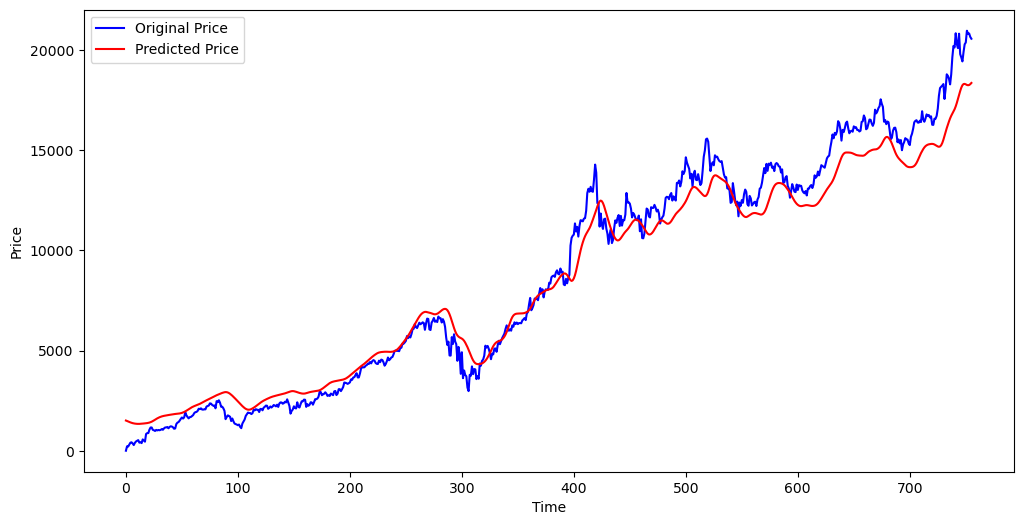

In [84]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b',label='Original Price')
plt.plot(y_predicted, 'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()